"""
Autor: Carlos Juárez
Fecha: 14/08/2024
Descripción: solución del servomecanismo
"""

In [3]:
# importación de librerias
import numpy as np
import matplotlib.pyplot as plt

In [137]:
# Parámetros del sistema (Los declaro acá arriba para que el scope sea global
L = 0.0047
R = 2.27
Km = 0.25
Kb = 0.25
B = 0.003026
J = 0.00246

In [186]:
# solución del método de Euler
def euler(f,x0,t0,tf,h):
    # f la función de incremento
    # x0 las condiciones inciales
    # t0 tiempo inicial
    # tf tiempo final de simulación
    # h paso de integración
    m = int((tf-t0)/h)
    # número de variables
    n = x0.size 
    #print(n)
    x = np.zeros([n,m])
    #print(x)
    t = np.zeros(m)
    x[:,0] = x0
    t[0] = t0
    for i in np.arange(m):
        
        x[:,i] = x[:,i-1] + h * f(t[i-1],x[:,i-1])
        t[i] = h + t[i-1]

    return x, t
    
    

In [170]:
# Función a resolver
def f (t,x):
    n = x.size
    sol = np.empty(n)
    if t < 0.1:
        V = 0
    else:
        V = 1
    if t < 1.5:
        TL = 0
    else:
        TL = 0.01
        
    sol[0] = -R/L*x[0]-Kb/L*x[1]+1/L*V
    sol[1] = Km/J*x[0]-B/J*x[1]-1/J*TL
    print(sol)
    return sol

In [172]:
a,b = euler(f,np.array([0,0]),0,3,0.001)


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


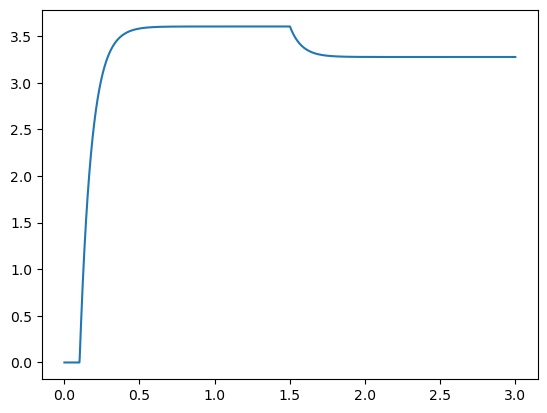

In [174]:
plt.plot(b,a[1])

In [198]:
# Agregamos retroalimentación
# Función a resolver
def f_lc (t,x):
    n = x.size
    sol = np.empty(n)
    # ecuación algebraica
    # Setpoint:
    wi = 3.5
    K = 5
    error = wi - x[1]
    V = K*error
    
    if t < 1.5:
        TL = 0
    else:
        TL = 0.01
        
    sol[0] = -R/L*x[0]-Kb/L*x[1]+1/L*V
    sol[1] = Km/J*x[0]-B/J*x[1]-1/J*TL
    return sol

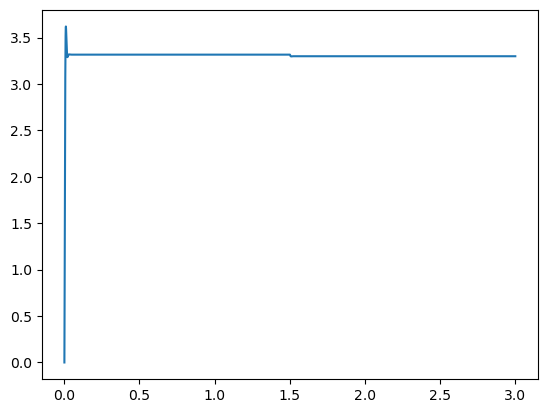

In [200]:
a,b = euler(f_lc,np.array([0,0]),0,3,0.001)
plt.plot(b,a[1])

Solución de un Servomotor

In [202]:
# Recuerde importa librerias y función euler para resolver
# Nueva función a resolver
# Función a resolver
def fth_la (t,x):
    n = x.size
    sol = np.empty(n)

    V = 1
   
    
    if t < 1.5:
        TL = 0
    else:
        TL = 0.01
        
    sol[0] = -R/L*x[0]-Kb/L*x[1]+1/L*V
    sol[1] = Km/J*x[0]-B/J*x[1]-1/J*TL
    sol[2] = x[1]
    return sol

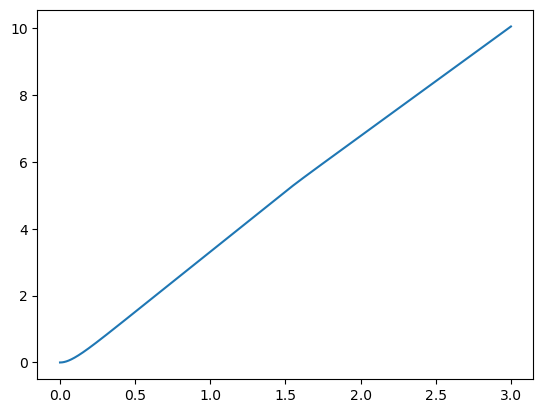

In [210]:
a,b = euler(fth_la,np.array([0,0,0]),0,3,0.001)
plt.plot(b,a[2])

In [232]:
# Agregamos retroalimentación
# Función a resolver
def fth_lc (t,x):
    n = x.size
    sol = np.empty(n)
    # ecuación algebraica
    # Setpoint:
    thi = 1
    K = 1
    error = thi - x[2]
    V = K*error
    
    if t < 1.5:
        TL = 0
    else:
        TL = 0.01
        
    sol[0] = -R/L*x[0]-Kb/L*x[1]+1/L*V
    sol[1] = Km/J*x[0]-B/J*x[1]-1/J*TL
    sol[2] = x[1]
    return sol

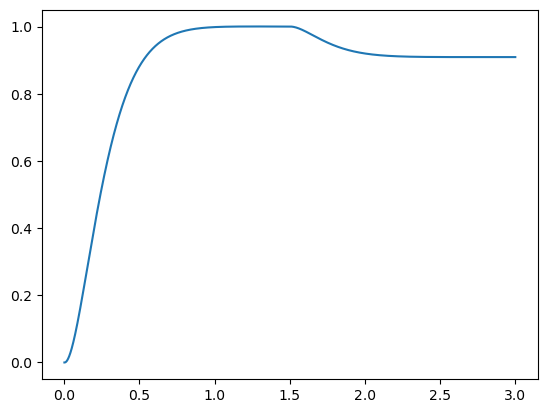

In [234]:
a,b = euler(fth_lc,np.array([0,0,0]),0,3,0.001)
plt.plot(b,a[2])